In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import silhouette_score, adjusted_rand_score

In [2]:
train =  pd.read_csv('../train.csv')
test =  pd.read_csv('../test.csv')

print("Train data shape:", train.shape)
print("Test data shape:", test.shape)

train.drop(columns=['Unnamed: 0','id'],inplace = True)
test.drop(columns=['Unnamed: 0','id'],inplace = True)

# y_train = train['satisfaction']
# train = train.drop('satisfaction', axis=1)

# y_test = test['satisfaction']
# test = test.drop('satisfaction', axis=1)

print("Train data shape:", train.shape)
print("Test data shape:", test.shape)


Train data shape: (103904, 25)
Test data shape: (25976, 25)
Train data shape: (103904, 23)
Test data shape: (25976, 23)


In [3]:
numerical_columns = ['Age', 'Flight Distance', 'Departure Delay in Minutes','Arrival Delay in Minutes']
# nominal_columns = ['Gender', 'Customer Type','Type of Travel', 'Class']
nominal_columns = ['Gender', 'Customer Type','Type of Travel', 'Class','satisfaction']

In [4]:
# drop rows with nulls values
train = train.dropna()

# encode nominal features
train_mappings = {}

for col in nominal_columns:
    encoder = LabelEncoder()
    train[col] = encoder.fit_transform(train[col])
    mapping = {category: label for category, label in zip(encoder.classes_, encoder.transform(encoder.classes_))}
    train_mappings[col] = mapping

print(train_mappings)


# scaling numerical features
for col in numerical_columns:
    scaler = StandardScaler()
    train[col] = scaler.fit_transform(train[[col]])
        
train

{'Gender': {'Female': 0, 'Male': 1}, 'Customer Type': {'Loyal Customer': 0, 'disloyal Customer': 1}, 'Type of Travel': {'Business travel': 0, 'Personal Travel': 1}, 'Class': {'Business': 0, 'Eco': 1, 'Eco Plus': 2}, 'satisfaction': {'neutral or dissatisfied': 0, 'satisfied': 1}}


,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,1,0,-1.745542,1,2,-0.731305,3,4,3,1,...,5,4,3,4,4,5,5,0.268966,0.072905,0
1,1,1,-0.951526,0,0,-0.956916,3,2,3,3,...,1,1,5,3,1,4,1,-0.360682,-0.237184,0
2,0,0,-0.885358,0,0,-0.047454,2,2,2,2,...,5,4,3,4,4,4,5,-0.386917,-0.392229,1
3,0,0,-0.951526,0,0,-0.629028,2,5,5,5,...,2,2,5,3,1,4,2,-0.098328,-0.159662,0
4,1,0,1.430521,0,0,-0.977973,3,3,3,3,...,3,3,4,4,3,3,3,-0.386917,-0.392229,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,0,1,-1.083862,0,1,-1.000033,2,1,2,3,...,2,3,1,4,2,3,2,-0.308211,-0.392229,0
103900,1,0,0.636505,0,0,1.160818,4,4,4,4,...,5,5,5,5,5,5,4,-0.386917,-0.392229,1
103901,1,1,-0.620686,0,0,0.807862,1,1,1,3,...,4,3,2,4,5,5,4,-0.203270,-0.030458,0
103902,0,1,-1.150030,0,1,-0.189839,1,1,1,5,...,1,4,5,1,5,4,1,-0.386917,-0.392229,0


In [5]:
# drop rows with nulls values
test = test.dropna()

# encode nominal features
test_mappings = {}

for col in nominal_columns:
    encoder = LabelEncoder()
    test[col] = encoder.fit_transform(test[col])
    mapping = {category: label for category, label in zip(encoder.classes_, encoder.transform(encoder.classes_))}
    test_mappings[col] = mapping

print(test_mappings)


# scaling numerical features
for col in numerical_columns:
    scaler = StandardScaler()
    test[col] = scaler.fit_transform(test[[col]])
        
test

{'Gender': {'Female': 0, 'Male': 1}, 'Customer Type': {'Loyal Customer': 0, 'disloyal Customer': 1}, 'Type of Travel': {'Business travel': 0, 'Personal Travel': 1}, 'Class': {'Business': 0, 'Eco': 1, 'Eco Plus': 2}, 'satisfaction': {'neutral or dissatisfied': 0, 'satisfied': 1}}


,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,0,0.817898,0,1,-1.035195,5,4,3,4,...,5,5,5,5,2,5,5,0.962074,0.779894,1
1,0,0,-0.239329,0,0,1.671574,1,1,3,1,...,4,4,4,4,3,4,5,-0.382547,-0.392913,1
2,1,1,-1.296556,0,1,-1.003150,2,0,2,4,...,2,4,1,3,2,2,2,-0.382547,-0.392913,0
3,1,0,0.289285,0,0,2.186291,0,0,0,2,...,1,1,1,1,3,1,4,-0.382547,-0.232985,1
4,0,0,0.619668,0,1,-0.011770,2,3,4,3,...,2,2,2,2,4,2,4,-0.382547,0.140181,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,1,1,-0.371482,0,0,-0.668684,3,3,3,1,...,4,3,2,4,4,5,4,-0.382547,-0.392913,0
25972,1,0,-1.098326,0,0,-0.548517,4,4,4,4,...,4,4,5,5,5,5,4,-0.382547,-0.392913,1
25973,0,0,-1.494786,1,1,-0.366263,2,5,1,5,...,2,4,3,4,5,4,2,-0.382547,-0.392913,0
25974,1,0,-1.693016,0,0,-0.066846,3,3,3,3,...,4,3,2,5,4,5,4,-0.382547,-0.392913,1


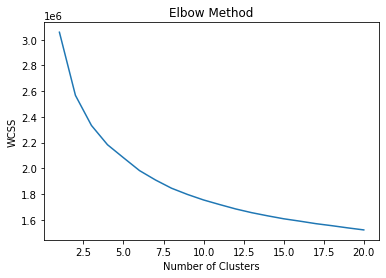

In [6]:
# Calculate WCSS for different values of k
wcss = []
for i in range(1, 21):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=10)
    kmeans.fit(train)
    wcss.append(kmeans.inertia_)

# Plot the elbow curve
# plt.figure(figsize=(24,7))
plt.plot(range(1, 21), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [7]:

# Create a K-Means object
kmeans = KMeans(n_clusters=3)  # Specify the number of clusters (k)

# Train the K-Means model
kmeans.fit(train)

# Get the cluster labels for each data point
labels = kmeans.labels_

# Get the cluster centers
centers = kmeans.cluster_centers_

# Print the cluster labels and centers
print("Cluster Labels:", labels)
print("Cluster Centers:", centers)

Cluster Labels: [2 1 2 ... 2 1 1]
Cluster Centers: [[ 0.49333879  0.12028164  0.13527126  0.22811733  0.44054575  0.18128868
   3.92465233  3.98220755  3.91185579  3.72131004  3.71304195  4.08569008
   4.0517997   4.09761014  3.84714269  3.78891551  4.00581395  3.62212224
   4.01507538  3.89044057 -0.03349124 -0.03763389  0.70573799]
 [ 0.4913015   0.23461086 -0.13183276  0.4119032   0.78950948 -0.21022534
   2.31236102  3.03283192  2.58736429  2.98663179  2.18228908  2.55280576
   2.34273381  2.02589928  2.74466972  2.85894048  3.12583388  2.88724657
   3.12381949  2.1275605   0.06786937  0.07317832  0.12510137]
 [ 0.49298353  0.1877589   0.01314161  0.27539257  0.52249446  0.05878792
   1.92874346  2.07999101  1.69583507  2.14716933  3.89239267  3.18891494
   4.11364439  4.1813365   3.65508494  3.4750008   3.8413988   3.4669728
   3.8638772   4.0449247  -0.04649718 -0.0484605   0.51247551]]


In [8]:
print(len(centers))
print(len(centers[0]))


3
23


In [9]:
train['KMeans'] = labels

test['KMeans']=kmeans.predict(test)
predictions = test['KMeans']


In [10]:
# silhouette_avg = silhouette_score(test, predictions)
# print("Silhouette Score: ", silhouette_avg)

In [11]:
train_plot = train.copy()
train_plot = train_plot.drop(['Age','Flight Distance','Departure Delay in Minutes','Arrival Delay in Minutes'], axis=1)
train_plot.columns

Index(['Gender', 'Customer Type', 'Type of Travel', 'Class',
       'Inflight wifi service', 'Departure/Arrival time convenient',
       'Ease of Online booking', 'Gate location', 'Food and drink',
       'Online boarding', 'Seat comfort', 'Inflight entertainment',
       'On-board service', 'Leg room service', 'Baggage handling',
       'Checkin service', 'Inflight service', 'Cleanliness', 'satisfaction',
       'KMeans'],
      dtype='object')

In [12]:
train_plot

,Gender,Customer Type,Type of Travel,Class,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,satisfaction,KMeans
0,1,0,1,2,3,4,3,1,5,3,5,5,4,3,4,4,5,5,0,2
1,1,1,0,0,3,2,3,3,1,3,1,1,1,5,3,1,4,1,0,1
2,0,0,0,0,2,2,2,2,5,5,5,5,4,3,4,4,4,5,1,2
3,0,0,0,0,2,5,5,5,2,2,2,2,2,5,3,1,4,2,0,1
4,1,0,0,0,3,3,3,3,4,5,5,3,3,4,4,3,3,3,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,0,1,0,1,2,1,2,3,2,2,2,2,3,1,4,2,3,2,0,1
103900,1,0,0,0,4,4,4,4,2,4,5,5,5,5,5,5,5,4,1,0
103901,1,1,0,0,1,1,1,3,4,1,5,4,3,2,4,5,5,4,0,2
103902,0,1,0,1,1,1,1,5,1,1,1,1,4,5,1,5,4,1,0,1


In [13]:
test_plot = test.copy()
test_plot = test_plot.drop(['Age','Flight Distance','Departure Delay in Minutes','Arrival Delay in Minutes'], axis=1)
test_plot.columns

Index(['Gender', 'Customer Type', 'Type of Travel', 'Class',
       'Inflight wifi service', 'Departure/Arrival time convenient',
       'Ease of Online booking', 'Gate location', 'Food and drink',
       'Online boarding', 'Seat comfort', 'Inflight entertainment',
       'On-board service', 'Leg room service', 'Baggage handling',
       'Checkin service', 'Inflight service', 'Cleanliness', 'satisfaction',
       'KMeans'],
      dtype='object')

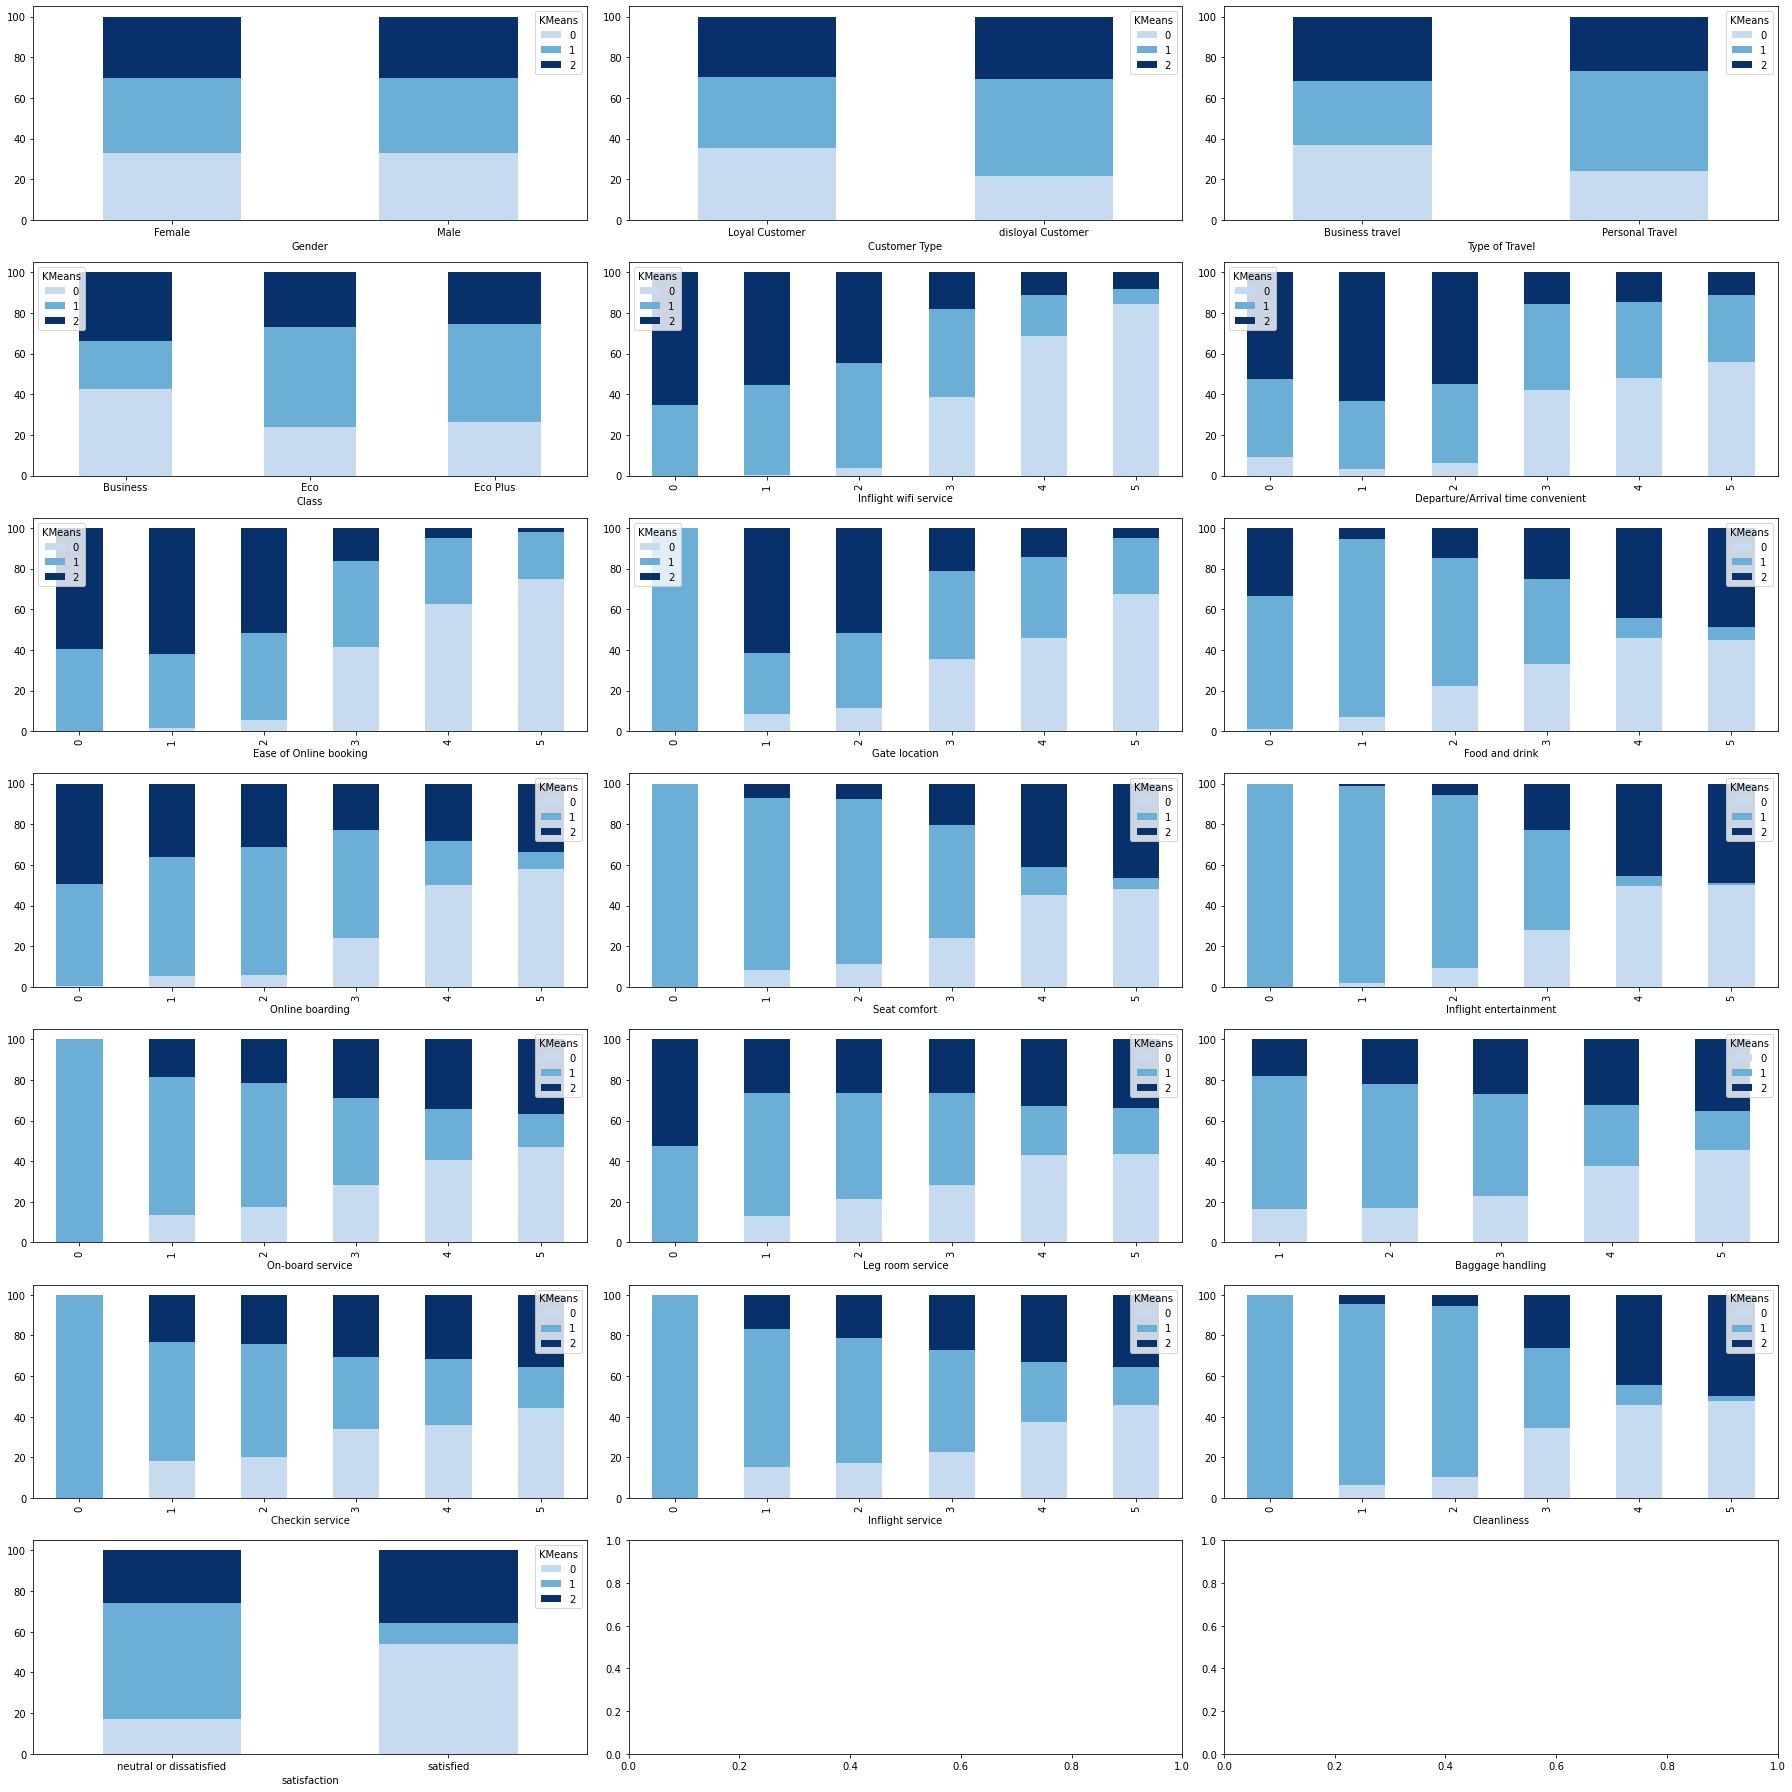

In [14]:
fig, axs = plt.subplots(nrows=7, ncols=3, figsize=(25, 25))
axs = axs.ravel()

i=0
for feature in train_plot.columns[:-1]:
    
    # define location
    plt.subplot(7, 3, i+1)
    
    # create plot
    ax = plt.gca()
    feature_counts = train_plot.groupby([feature, 'KMeans']).size().unstack(fill_value=0)
    feature_percentages = feature_counts.div(feature_counts.sum(axis=1), axis=0) * 100
    feature_percentages.plot(kind='bar', stacked=True, ax=axs[i], color=['#c6dbef', '#6baed6', '#08306b'])  
    
    if feature in nominal_columns:
        xticks_labels = list(train_mappings[feature].keys())
        ax.set_xticklabels(xticks_labels,rotation=0)  
    i += 1    

plt.tight_layout()
plt.show()

<font color='pink'>**here after using the kmens with 3 clusters we can conclude that**</font>

**we can see that the majority of <font color='#c6dbef'>cluster 0</font> is <font color='green'>satisfied ✅</font> and the majority of <font color='#6baed6'>cluster 1</font> is <font color='red'>neural or dissatisfied ❌</font> the majority of <font color='#08306b'>cluster 2</font> is <font color='green'>satisfied ✅</font>**

**1-Gender** : the males and females are equally disributed along clusters

**2-Customer Type** : majority of loyal customers takes <font color='#08306b'>cluster 2</font> and majority of disloyal customers takes <font color='#6baed6'>cluster 1</font>

**3-Type of Travel** : majority of personal travel takes <font color='#08306b'>cluster 2</font> and majority of business travel takes <font color='#6baed6'>cluster 1</font>

**4-Class** : majority of business takes <font color='#08306b'>cluster 2</font> and majority eco and eco plus takes <font color='#6baed6'>cluster 1</font>

**5-Inflight wifi service** : majority of 0,1 takes <font color='#c6dbef'>cluster 0</font> and majority of 4,5 takes <font color='#08306b'>cluster 2</font>

**6-Departure/Arrival time convenient** : majority of 0,1,2 takes <font color='#c6dbef'>cluster 0</font> and majority of 3,4,5 takes <font color='#08306b'>cluster 2</font>

**7-Ease of Online booking** : majority of 0,1,2 takes <font color='#c6dbef'>cluster 0</font> and majority of 3,4,5 takes <font color='#08306b'>cluster 2</font>

**8-Gate location** : majority of 0  takes <font color='#6baed6'>cluster 1</font>
 majority of 1,2 takes <font color='#c6dbef'>cluster 0</font> and majority of 3,4,5 takes <font color='#08306b'>cluster 2</font>

**9-Food and drink** : majority of 0,1,2,3 takes <font color='#6baed6'>cluster 1</font> and majority of 4,5 takes <font color='#08306b'>cluster 2</font> and <font color='#c6dbef'>cluster 0</font>


**10-Online boarding** : majority of 0,1,2,3 takes <font color='#6baed6'>cluster 1</font> and majority of 4,5 takes <font color='#08306b'>cluster 2</font> 

**11-Seat comfort** : majority of 0,1,2,3 takes <font color='#6baed6'>cluster 1</font> and majority of 4,5 takes <font color='#08306b'>cluster 2</font> and <font color='#c6dbef'>cluster 0</font>

**12-Inflight entertainment** : majority of 0,1,2,3 takes <font color='#6baed6'>cluster 1</font> and majority of 4,5 takes <font color='#08306b'>cluster 2</font> and <font color='#c6dbef'>cluster 0</font>

**13-On-board service** : majority of 0,1,2,3 takes <font color='#6baed6'>cluster 1</font> and majority of 4,5 takes <font color='#08306b'>cluster 2</font> and <font color='#c6dbef'>cluster 0</font>

**14-Leg room service** : majority of 1,2 takes <font color='#6baed6'>cluster 1</font>  and  3,4,5  equally distributed in all clusters and 0  equally distributed in <font color='#6baed6'>cluster 1</font> and <font color='#c6dbef'>cluster 0</font>

**15-Baggage handling** : majority of 1,2,3 takes <font color='#6baed6'>cluster 1</font> and majority of 4,5 takes <font color='#08306b'>cluster 2</font> 

**16-Checkin service** : majority of 0,1,2,3 takes <font color='#6baed6'>cluster 1</font> and majority of 4,5 takes <font color='#08306b'>cluster 2</font> and <font color='#c6dbef'>cluster 0</font>

**17-Inflight service** : majority of 0,1,2,3 takes <font color='#6baed6'>cluster 1</font> and majority of 4,5 takes <font color='#08306b'>cluster 2</font> 

**18-Cleanliness** : majority of 0,1,2 takes <font color='#6baed6'>cluster 1</font> and majority of 4,5 takes <font color='#08306b'>cluster 2</font> and <font color='#c6dbef'>cluster 0</font> and  3  equally distributed in all clusters

**what we can conclude is that for most of services the majority of customers who give rating 0,1,2,3 falls in  <font color='#6baed6'>cluster 1</font>  and who give 4,5 falls in  <font color='#c6dbef'>cluster 0</font> and <font color='#08306b'>cluster 2</font> and we can see that the majority of <font color='#c6dbef'>cluster 0</font> is <font color='green'>satisfied ✅</font> and the majority of <font color='#6baed6'>cluster 1</font> is <font color='red'>neural or dissatisfied ❌</font> the majority of <font color='#08306b'>cluster 2</font> is <font color='green'>satisfied ✅</font>**



**<font color='#c6dbef'>Cluster 0</font>**

- Satisfied customers percentage is a little bit more than unsatisfied (Quite satisfied)

- Some features have a high rate (4,5) in it: 
    - Cleanliness
    - Inflight entertainment
    - Seat comfort
    - Food and drink
    - On-board service
    - Online boarding

- Some features have a low rate (0:3) in it: 
    - Inflight wifi service
    - Departure/Arrival time convenient
    - Ease of Online booking
    - Gate Location
    - Online boarding
    - Leg room service

**<font color='#6baed6'>Cluster 1</font>**

- The majority in it is unsatisfied customers

- The majority in it is disloyal customers

- The majority is in Eco & Eco plus class, and for a personal travel

- Most of the services have low rate in this cluster (0:3)


**<font color='#08306b'>Cluster 2</font>**

- The majority in it is satisfied customers

- The majority in it is loyal customers

- The majority is in Business class, and for a business travel

- Some features have a high rate (4,5) in it with very high percentage: 
    - Inflight wifi service
    - Departure/Arrival time convenient
    - Ease of Online booking
    - Gate Location

- The rest of the services have also a high rate (4,5) with a good percentage